#GLOBAL SOLUTION


####Rafael Vida Fernandes RM553721
####Kauã Almeida Silveira RM552618
####Gustavo Araújo Maia RM553270


In [ ]:
#Vou importar o roboflow e o meu projeto do Roboflow

!pip install roboflow

from roboflow import Roboflow

rf = Roboflow(api_key="Fw1bJ1faUSmk583FA2Wr")
project = rf.workspace("odontoprev-ky4br").project("lixo-com-impacto-ambiental")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Lixo-com-impacto-ambiental-1 in yolov8:: 100%|██████████| 4978/4978 [00:00<00:00, 5567.64it/s]


### Instalação de dependências

In [ ]:
#Instalei o ultralytics pro YOLO e importei outras dependências, defini também um path pros datasets

!pip install ultralytics==8.2.103 -q
import ultralytics
from ultralytics import YOLO

import cv2
from google.colab.patches import cv2_imshow
from IPython.display import Image
import os
HOME = os.getcwd()
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.1/875.1 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 110.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Treinar o modelo com o yolov8s

In [ ]:
#Vou treinar o meu modelo, ajustei os hiperparâmetros porque o dataset é pesado
#Usei o yolov8s e 15 epochs pro treinamento ser mais rápido

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=15 imgsz=640 batch=16 lr0=0.001

New https://pypi.org/project/ultralytics/8.3.150 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Lixo-com-impacto-ambiental-1/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

In [ ]:
#vou listar todos os arquivos que estão no diretório, pra ficar mais fácil de identificar os gráficos

!ls runs/detect/train2

args.yaml					    train_batch1.jpg
confusion_matrix_normalized.png			    train_batch2.jpg
confusion_matrix.png				    train_batch550.jpg
events.out.tfevents.1749074322.b96a780ce0fc.3466.0  train_batch551.jpg
F1_curve.png					    train_batch552.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


/content


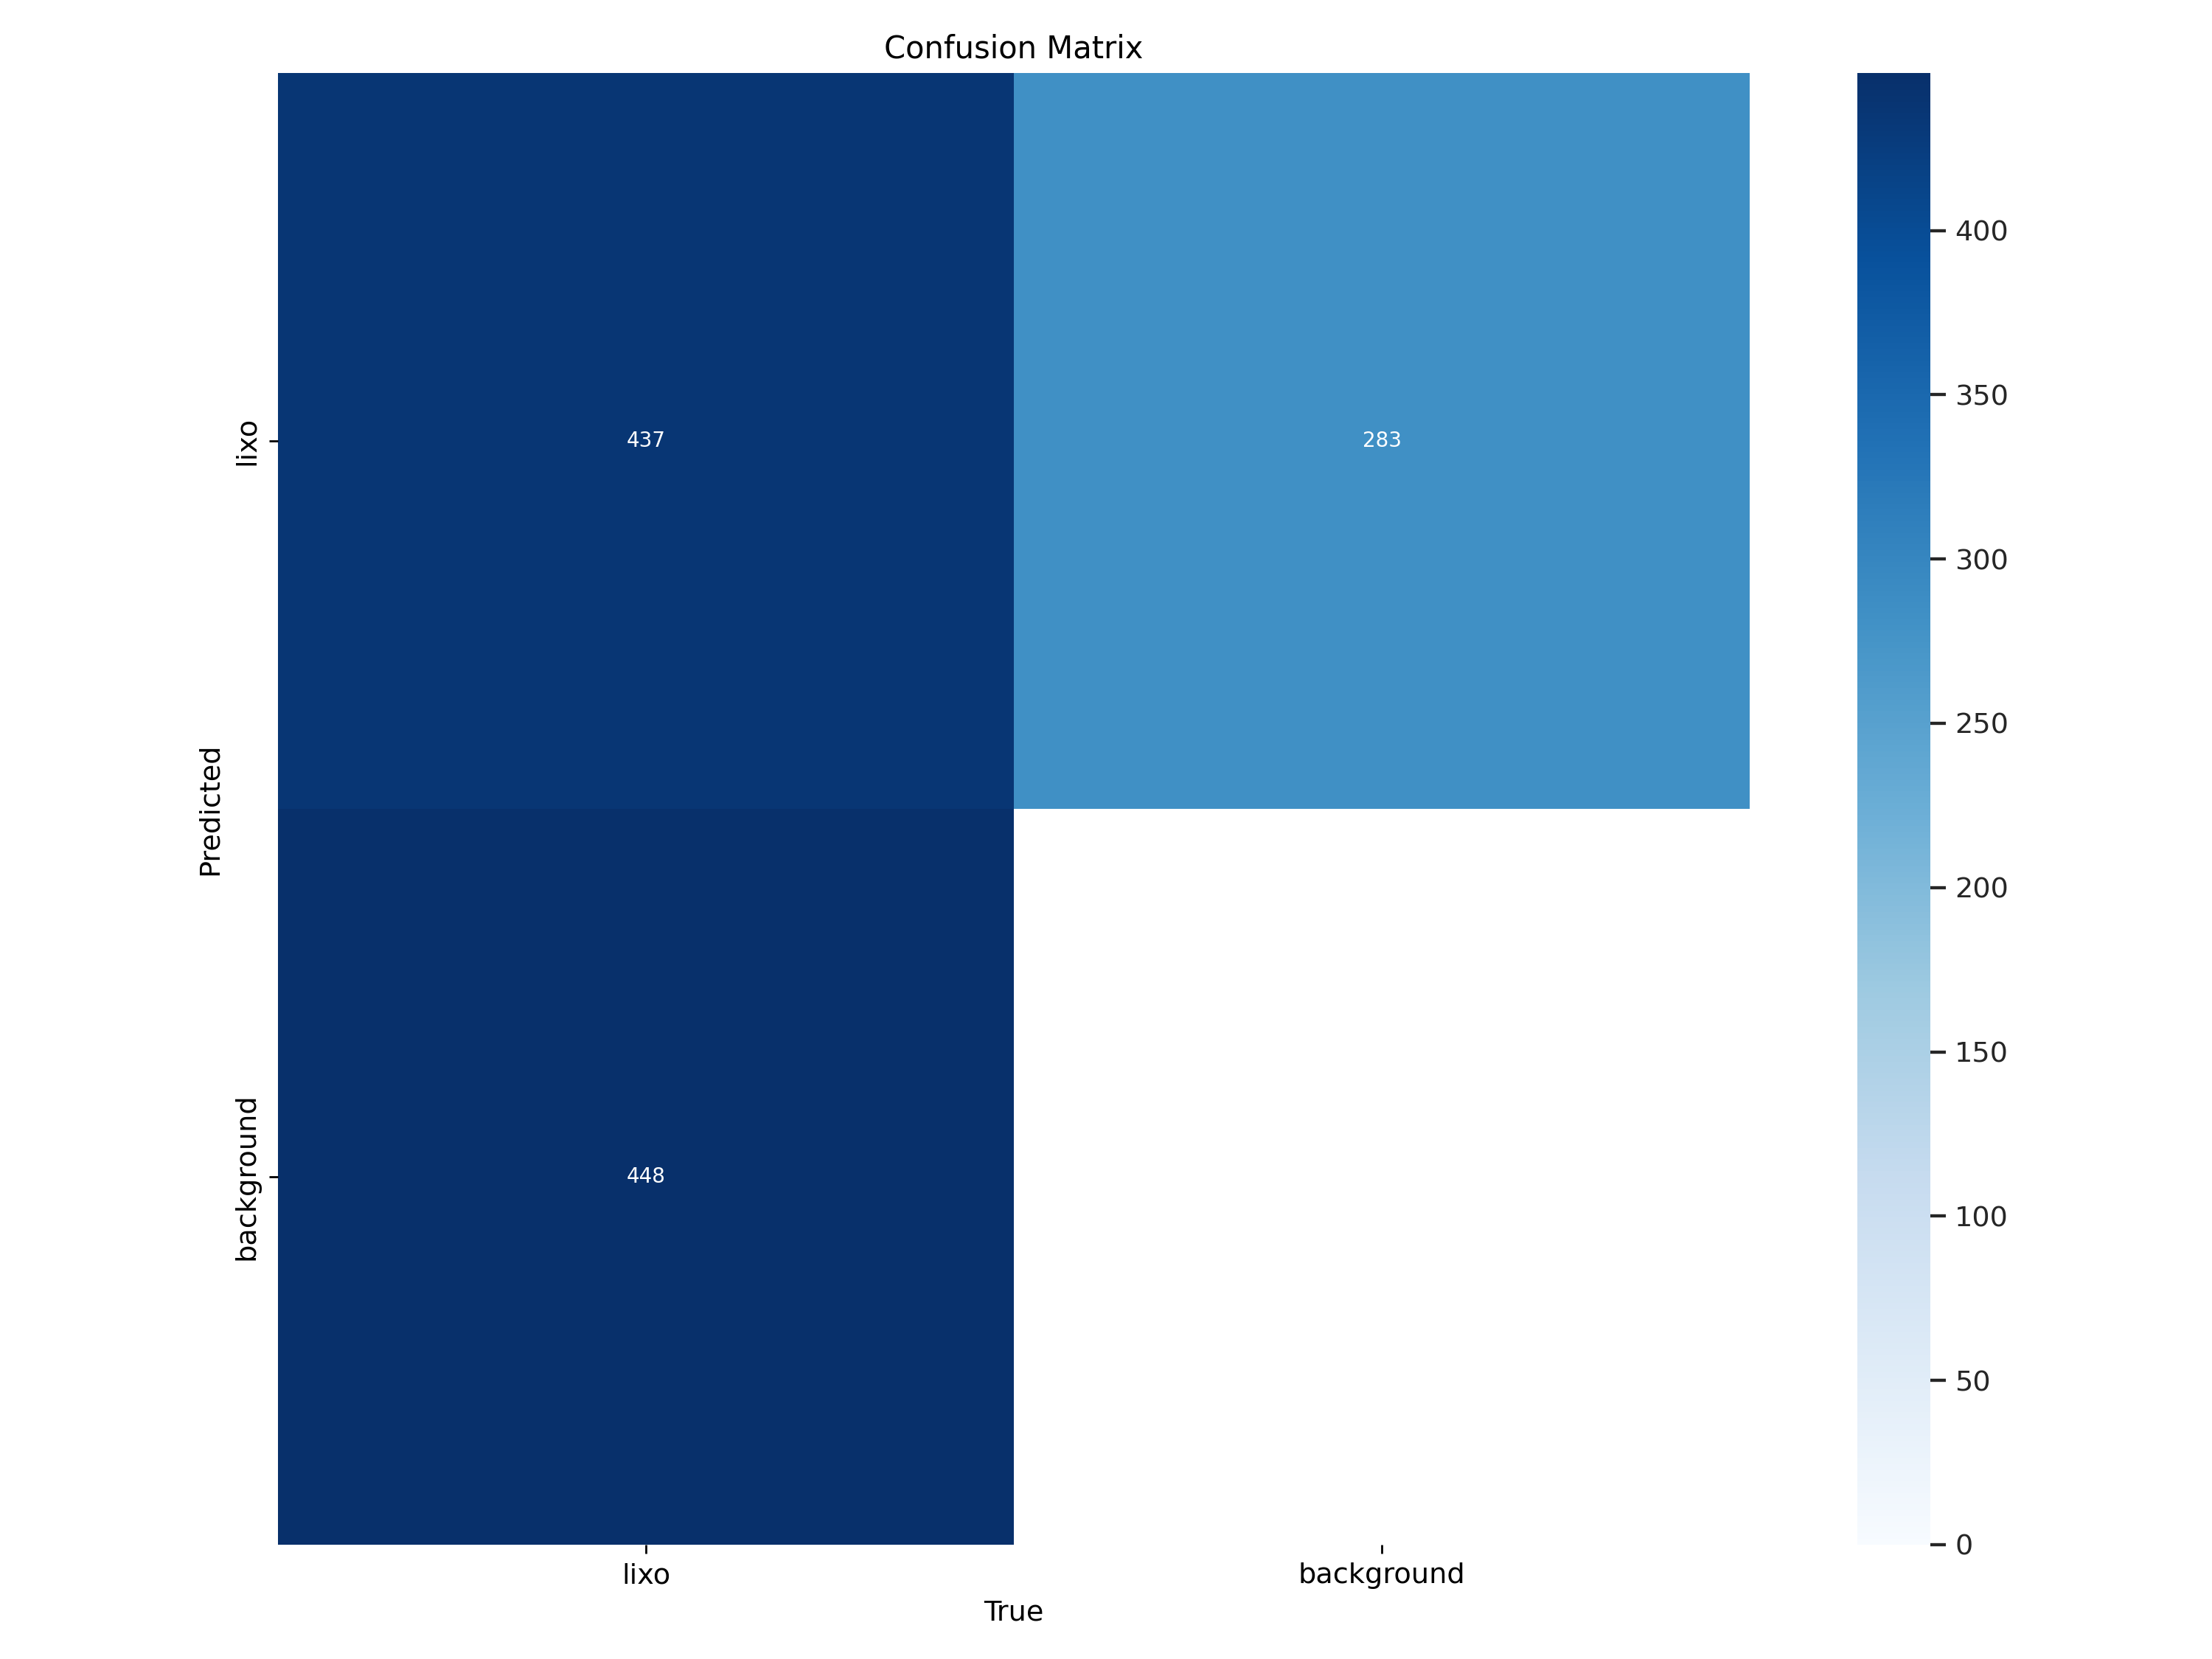

In [ ]:
#Matriz de confusão

%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train2/confusion_matrix.png', width=600)

In [ ]:
#Vou validar o modelo
%cd {HOME}

!yolo task=detect mode=val model=datasets/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Lixo-com-impacto-ambiental-1/valid/labels.cache... 251 images, 1 backgrounds, 0 corrupt: 100% 251/251 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:05<00:00,  3.15it/s]
                   all        251        885      0.545      0.461      0.482      0.222
Speed: 2.8ms preprocess, 9.1ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


#IDENTIFICAR LIXO URBANO


In [ ]:
!yolo task=detect mode=predict model=datasets/runs/detect/train2/weights/best.pt conf=0.50 source='/content/imagem (3).png' save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/imagem (3).png: 448x640 2 lixos, 66.4ms
Speed: 7.0ms preprocess, 66.4ms inference, 185.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


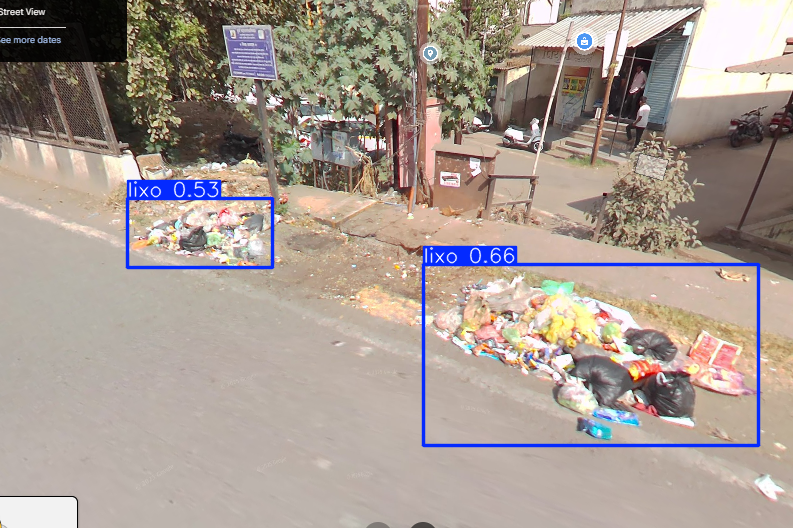

In [ ]:
resultado = cv2.imread('runs/detect/predict3/imagem (3).png')
cv2_imshow(resultado)